<a href="https://colab.research.google.com/github/Houssam-Al-Deen/VIPP301A_Codes/blob/main/Dataset_from_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outputs will be saved to: /content/final_stage_outputs_v2
📦 Loading: /content/BC_merged_balanced_unified_ALL_clean_coded_filled.xlsx
🧾 Using sheet: Sheet1
Original shape: (94, 448)
Shape after keeping *_coded + target: (94, 124)
Dropped soft-leakage columns: 65
… first few: ['Anthracycline (adjuvant/neoadjuvant)_ (yes/no)_coded', 'Axilla status (positive , negative)_coded', 'Axillary involvment/metastasis on the side of breast cancer (yes/no)_coded', 'Chest involvement (yes/no)_coded', 'Clinical Stage_coded', 'Clinical nodal status on MRI (positive/negative)_coded', 'Clinical nodal status on fine needle aspiration (positive/negative/not done/Inconlusive;Atypical;Suspicious)_coded', 'Clinical nodal status on ultra sound (positive/negative/not done/missing)_coded']
New shape: (94, 59)
⚠️  NA-aware: found 3106 residual NaNs in 57 columns:
    ['Extent of Calcification (from mamogram)_coded', 'Number of tumors (1,2,3,4..)_coded', 'Multifocality (unifocal/multifocal/multicentric)_coded', 'B

,Model,AUC_NAaware,AUC_Imputed,ΔAUC (Imputed - NA)
0,XGBoost,0.622222,0.666667,0.044444
1,DecisionTree,0.477778,0.627778,0.150000
2,RandomForest,0.638889,0.566667,-0.072222
3,KNN,0.572222,0.511111,-0.061111
4,LogReg,0.500000,0.422222,-0.077778



📊 Full metric comparison (same split, baseline)


,Model,Prec_NAaware,Prec_Imputed,Rec_NAaware,Rec_Imputed,F1_NAaware,F1_Imputed
0,XGBoost,0.500,0.636,0.667,0.778,0.571,0.700
1,DecisionTree,0.455,0.625,0.556,0.556,0.500,0.588
2,RandomForest,0.462,0.545,0.667,0.667,0.545,0.600
3,KNN,0.600,0.400,0.333,0.222,0.429,0.286
4,LogReg,0.455,0.500,0.556,0.667,0.500,0.571



📈 Accuracy comparison (same split, baseline)


,Model,Acc_NAaware,Acc_Imputed,ΔAccuracy (Imputed - NA)
0,XGBoost,0.526,0.684,0.158
1,DecisionTree,0.474,0.632,0.158
2,RandomForest,0.474,0.579,0.105
3,KNN,0.579,0.474,-0.105
4,LogReg,0.474,0.526,0.053


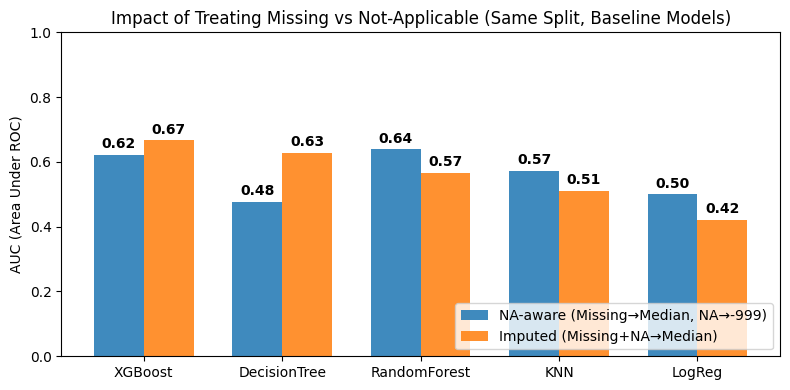


🧩 Baseline Summary:
• NA-aware keeps a visible NA signal (-999) while imputing true missing with median.
• Imputed removes the distinction and imputes both missing and NA with median.
• On average across models, ΔAUC ≈ -0.003 (Imputed - NA-aware).
• Best AUC (Imputed, baseline) model here: XGBoost with AUC=0.667.
• If Recall is low (class imbalance), you can use threshold tuning, class_weight='balanced', or SMOTE.


================ HYPERPARAMETER TUNING (RandomizedSearchCV) ================


[NA_AWARE] 🔍 Random search for xgb ...
[NA_AWARE] xgb: AUC_CV=0.661

[NA_AWARE] 🔍 Random search for rf ...
[NA_AWARE] rf: AUC_CV=0.650

[NA_AWARE] 🔍 Random search for logreg ...
[NA_AWARE] logreg: AUC_CV=0.655

[NA_AWARE] 🔍 Random search for knn ...
[NA_AWARE] knn: AUC_CV=0.607

[NA_AWARE] 🔍 Random search for dt ...
[NA_AWARE] dt: AUC_CV=0.623

[NA_AWARE] Random search summary (top rows):


,strategy,model,best_auc_cv,best_params
0,NA_AWARE,xgb,0.660714,{'model__colsample_bytree': 0.8604308102007778...
1,NA_AWARE,logreg,0.655357,"{'model__C': 0.1767016940294795, 'model__penal..."
2,NA_AWARE,rf,0.650000,"{'model__max_depth': 20, 'model__max_features'..."
3,NA_AWARE,dt,0.623214,"{'model__criterion': 'gini', 'model__max_depth..."
4,NA_AWARE,knn,0.607143,"{'model__n_neighbors': 28, 'model__p': 2, 'mod..."



[IMPUTED] 🔍 Random search for xgb ...
[IMPUTED] xgb: AUC_CV=0.677

[IMPUTED] 🔍 Random search for rf ...
[IMPUTED] rf: AUC_CV=0.675

[IMPUTED] 🔍 Random search for logreg ...
[IMPUTED] logreg: AUC_CV=0.705

[IMPUTED] 🔍 Random search for knn ...
[IMPUTED] knn: AUC_CV=0.632

[IMPUTED] 🔍 Random search for dt ...
[IMPUTED] dt: AUC_CV=0.607

[IMPUTED] Random search summary (top rows):


,strategy,model,best_auc_cv,best_params
0,IMPUTED,logreg,0.705357,"{'model__C': 0.4731474644815003, 'model__penal..."
1,IMPUTED,xgb,0.676786,{'model__colsample_bytree': 0.6677970986744369...
2,IMPUTED,rf,0.675000,"{'model__max_depth': 11, 'model__max_features'..."
3,IMPUTED,knn,0.632143,"{'model__n_neighbors': 26, 'model__p': 1, 'mod..."
4,IMPUTED,dt,0.607143,"{'model__criterion': 'log_loss', 'model__max_d..."



Combined tuning summary (top 10):


,strategy,model,best_auc_cv,best_params
5,IMPUTED,logreg,0.705357,"{'model__C': 0.4731474644815003, 'model__penal..."
6,IMPUTED,xgb,0.676786,{'model__colsample_bytree': 0.6677970986744369...
7,IMPUTED,rf,0.675000,"{'model__max_depth': 11, 'model__max_features'..."
0,NA_AWARE,xgb,0.660714,{'model__colsample_bytree': 0.8604308102007778...
1,NA_AWARE,logreg,0.655357,"{'model__C': 0.1767016940294795, 'model__penal..."
2,NA_AWARE,rf,0.650000,"{'model__max_depth': 20, 'model__max_features'..."
8,IMPUTED,knn,0.632143,"{'model__n_neighbors': 26, 'model__p': 1, 'mod..."
3,NA_AWARE,dt,0.623214,"{'model__criterion': 'gini', 'model__max_depth..."
4,NA_AWARE,knn,0.607143,"{'model__n_neighbors': 28, 'model__p': 2, 'mod..."
9,IMPUTED,dt,0.607143,"{'model__criterion': 'log_loss', 'model__max_d..."



🏆 Top tuned model: logreg (IMPUTED) | CV AUC=0.705

📘 Tuned models — AUC comparison (same split):


,Model,AUC_NAaware,AUC_Imputed,ΔAUC (Imputed - NA)
0,rf,0.722222,0.755556,0.033333
1,xgb,0.661111,0.700000,0.038889
2,logreg,0.655556,0.511111,-0.144444
3,knn,0.427778,0.511111,0.083333
4,dt,0.644444,0.438889,-0.205556



================ LONG REFIT & THRESHOLD TUNING ================

Top model is NOT XGB → we will use best tuned estimator directly with default threshold 0.5 (no long refit).

================ EXPLAINABLE AI (Permutation Importance, SHAP, PDP) ================

Final feature_names length for PI: 58
Shape of Xte_p: (19, 58)

Top permutation importance features:


,feature,importance_mean,importance_std
7,Neoadjuv chemo (yes/no)_coded,0.102105,0.064383
55,Wire localization (yes/no)_coded,0.055789,0.052007
18,Margins (positive/negative)_coded,0.005263,0.021701
1,"Number of tumors (1,2,3,4..)_coded",0.000000,0.000000
4,ER status (positive/negative)_coded,0.000000,0.000000
2,Multifocality (unifocal/multifocal/multicentri...,0.000000,0.000000
8,surgery (yes/no)_coded,0.000000,0.000000
6,HER 2 status (positive/negative)_coded,0.000000,0.000000
9,breast surgery type (partial mastectomy/ total...,0.000000,0.000000
3,"Biopsy (excisional biopsy, core biopsy, no bio...",0.000000,0.000000



Computing SHAP explanations...
Saved SHAP figures to /content/final_stage_outputs_v2

Creating PDP plots...
Final model classes_ attribute: [0 1]
Failed to plot PDP for feature 'Neoadjuv chemo (yes/no)_coded': cannot reshape array of size 1 into shape (2)
Unique values for 'Neoadjuv chemo (yes/no)_coded': [0.         2.38848658]
Failed to plot PDP for feature 'Wire localization (yes/no)_coded': cannot reshape array of size 1 into shape (2)
Unique values for 'Wire localization (yes/no)_coded': [0.        2.1964028]
Failed to plot PDP for feature 'Margins (positive/negative)_coded': cannot reshape array of size 1 into shape (2)
Unique values for 'Margins (positive/negative)_coded': [0.         2.72772363]
Failed to plot PDP for feature 'Number of tumors (1,2,3,4..)_coded': cannot reshape array of size 1 into shape (2)
Unique values for 'Number of tumors (1,2,3,4..)_coded': [2.20779304 4.41558607]
Failed to plot PDP for feature 'ER status (positive/negative)_coded': cannot reshape array 

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Breast Cancer Recurrence — NA-aware vs Imputed
+ Hyperparameter Tuning + Long Refit + Threshold Tuning + XAI

This file merges:
- Your original NA-aware vs Imputed script (BC_merged_balanced_unified_ALL_clean_coded_filled.xlsx)
- Your friend's "final stage add-only" notebook (random search, long XGB refit, XAI)

Dataset + NA definitions are kept the same as your original second code.
"""

# === (Optional, for Colab) install extras ===
# !pip -q install xgboost shap imbalanced-learn

import re, warnings, os, json, math
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

from pathlib import Path

from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_fscore_support,
    classification_report, average_precision_score
)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint, uniform, loguniform
import joblib
import shap

try:
    from xgboost import XGBClassifier
    HAVE_XGB = True
except Exception:
    HAVE_XGB = False

# =========================
# Configuration (your original dataset)
# =========================
DATA_PATH    = "/content/BC_merged_balanced_unified_ALL_clean_coded_filled.xlsx"
TARGET_COL   = "Recurrence (yes/no)_coded"
TEST_SIZE    = 0.2
RANDOM_STATE = 42

KEEP_CODED_ONLY   = True
DROP_SOFT_LEAKAGE = True

# NA handling settings (as in your original)
NA_TOKENS   = {-999, "-999", "NA", "N/A", "Not applicable",
               "not applicable", "na", "Na"}
NA_SENTINEL = -999  # sentinel for NA-aware

# Where to save XAI outputs etc (friend’s convention)
OUTDIR = Path("/content/final_stage_outputs_v2")
OUTDIR.mkdir(parents=True, exist_ok=True)
print("Outputs will be saved to:", OUTDIR)

# =========================
# Loading
# =========================
def read_any(path):
    ext = str(path).split(".")[-1].lower()
    if ext in ("xlsx", "xls"):
        sheets = pd.read_excel(path, sheet_name=None)
        sheet_name = next(iter(sheets))
        print("📦 Loading:", path)
        print("🧾 Using sheet:", sheet_name)
        df = sheets[sheet_name]
    elif ext in ("csv",):
        print("📦 Loading:", path)
        df = pd.read_csv(path)
    else:  # TSV or generic delimited
        print("📦 Loading:", path)
        df = pd.read_csv(path, sep="\t")
    df.columns = df.columns.astype(str).str.strip()
    return df

def keep_coded_plus_target(df, target):
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in columns.")
    cols = [c for c in df.columns if c.endswith("_coded")] + [target]
    cols = list(dict.fromkeys(cols))  # deduplicate
    return df[cols]

# =========================
# Optional "soft leakage" drop (same as original)
# =========================
def leakage_regex_rules():
    return [
        r"\bmetast", r"\brecurr", r"follow\s*up", r"\bsurvival\b", r"\bdeath\b",
        r"date.*(diagnosis|recurr|metast|follow)",

        r"\bcT_coded\b", r"\bcN_coded\b", r"\bcM_coded\b", r"\bClinical Stage_coded\b",

        r"mammogram.*_coded$", r"ultrasound.*_coded$", r"mri.*_coded$",
        r"number of masses.*_coded$", r"size of mass.*_coded$",
        r"imaging for axilla.*_coded$", r"axilla status.*_coded$",
        r"palpable aln.*_coded$", r"chest involvement.*_coded$",
        r"skin involvement.*_coded$", r"inflammatory.*_coded$",

        r"pet.*_coded$", r"axillary ln active.*_coded$",
        r"clinical nodal status.*_coded$",
        r"fine needle aspiration.*_coded$",

        r"regimen.*_coded$", r"number of cycles.*_coded$",
        r"herceptin.*_coded$", r"anthracycline.*_coded$", r"taxane.*_coded$", r"neo-?taxanes.*_coded$",

        r"luminal type.*_coded$", r"grade.*_coded$", r"type br ca.*_coded$",
    ]

def drop_soft_leakage(df, target):
    pats = leakage_regex_rules()
    to_drop = []
    for c in df.columns:
        if c == target:
            continue
        for pat in pats:
            if re.search(pat, c, flags=re.I):
                to_drop.append(c)
                break
    to_drop = sorted(set(to_drop))
    return df.drop(columns=to_drop, errors="ignore"), to_drop

# =========================
# NA handling (your original definitions)
# =========================
def to_numeric_df(Xdf: pd.DataFrame) -> pd.DataFrame:
    X = Xdf.copy()
    for c in X.columns:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    return X

def build_na_masks(Xraw: pd.DataFrame):
    """
    Return numeric df, NA-flag mask, and true-missing mask.
    """
    str_df = Xraw.astype("string").apply(lambda s: s.str.strip().str.lower())
    is_na_flag = pd.DataFrame(False, index=Xraw.index, columns=Xraw.columns)

    for tok in NA_TOKENS:
        if isinstance(tok, (int, float, np.integer, np.floating)):
            is_na_flag |= (Xraw == float(tok))  # numeric compare
            is_na_flag |= (str_df == str(tok).strip().lower())  # also match if stored as string
        else:
            is_na_flag |= (str_df == str(tok).strip().lower())

    Xnum = to_numeric_df(Xraw)
    is_missing = Xnum.isna() & (~is_na_flag)  # exclude NA-flagged from missing
    return Xnum, is_na_flag, is_missing

def _safe_column_median(series: pd.Series) -> float:
    """Median over non-NaN values; if none, return 0.0 to keep shape stable."""
    vals = series.dropna().values
    return float(np.median(vals)) if vals.size else 0.0

def make_na_aware(Xdf: pd.DataFrame) -> pd.DataFrame:
    """
    NA-aware:
      - Missing (true NaN, not flagged) -> impute with column median
      - NA-flagged entries -> keep as NA_SENTINEL (distinct)
    """
    Xraw = Xdf.copy()
    Xnum, is_na_flag, is_missing = build_na_masks(Xraw)
    X_out = Xnum.copy()

    for c in X_out.columns:
        valid = ~(is_na_flag[c] | is_missing[c])
        med = _safe_column_median(X_out.loc[valid, c])
        X_out.loc[is_missing[c], c] = med           # impute missing
        X_out.loc[is_na_flag[c],   c] = NA_SENTINEL # keep NA distinct
    return X_out

def make_imputed(Xdf: pd.DataFrame) -> pd.DataFrame:
    """
    Imputed:
      - Treat NA and Missing the same -> BOTH imputed with column median (no distinction).
      - Per-column implementation (robust for all-NaN columns).
    """
    Xraw = Xdf.copy()
    Xnum, is_na_flag, is_missing = build_na_masks(Xraw)
    X_imp = Xnum.copy()

    to_nan = is_na_flag | is_missing
    for c in X_imp.columns:
        X_imp.loc[to_nan[c], c] = np.nan
        med = _safe_column_median(X_imp[c])
        X_imp[c] = X_imp[c].fillna(med)
    return X_imp

# ---------- final guard against residual NaNs / inf ----------
def sanitize(X: pd.DataFrame, name: str, fill_value: float = 0.0) -> pd.DataFrame:
    """Replace ±inf with NaN, report remaining NaNs, then fill (without touching -999)."""
    X = X.replace([np.inf, -np.inf], np.nan)
    n_missing = int(X.isna().sum().sum())
    if n_missing > 0:
        cols_with_nan = X.columns[X.isna().any()].tolist()
        print(f"⚠️  {name}: found {n_missing} residual NaNs in {len(cols_with_nan)} columns:")
        print("   ", cols_with_nan[:10], ("..." if len(cols_with_nan) > 10 else ""))
        X = X.fillna(fill_value)
        print(f"   → Filled residual NaNs with {fill_value}.")
    return X

# =========================
# Baseline modeling (your original build_models / eval_models)
# =========================
def build_models(y_train: pd.Series):
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    spw = max(1.0, neg / max(1, pos))  # for XGB & to mitigate imbalance

    models = [
        ("LogReg",
         Pipeline([
             ("scaler", StandardScaler(with_mean=False)),
             ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
         ])),
        ("DecisionTree",
         DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced")),
        ("RandomForest",
         RandomForestClassifier(n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1,
                                class_weight="balanced")),
        ("KNN",
         Pipeline([
             ("scaler", StandardScaler(with_mean=False)),
             ("clf", KNeighborsClassifier(n_neighbors=5))
         ])),
    ]
    if HAVE_XGB:
        models.append((
            "XGBoost",
            XGBClassifier(
                n_estimators=400, learning_rate=0.1, max_depth=5,
                subsample=0.9, colsample_bytree=0.9,
                random_state=RANDOM_STATE, n_jobs=-1,
                objective="binary:logistic", eval_metric="auc", tree_method="hist",
                scale_pos_weight=spw
            )
        ))
    return models

def eval_models(models, Xtr, ytr, Xte, yte):
    rows = []
    for name, clf in models:
        clf.fit(Xtr, ytr)
        proba = clf.predict_proba(Xte)[:, 1] if hasattr(clf, "predict_proba") else clf.predict(Xte).astype(float)
        pred  = (proba >= 0.5).astype(int)
        rows.append({
            "Model": name,
            "AUC": roc_auc_score(yte, proba),
            "Accuracy": accuracy_score(yte, pred),
            "Precision": precision_score(yte, pred, zero_division=0),
            "Recall": recall_score(yte, pred, zero_division=0),
            "F1": f1_score(yte, pred, zero_division=0),
        })
    return pd.DataFrame(rows)

# =========================
# NEW: Hyperparameter tuning (friend-style)
# =========================

def make_preprocess(strategy, needs_scaling):
    """
    Preprocessing for hyperparameter search:
    - We already did NA-aware / Imputed at matrix level, so here we only handle scaling.
    - Keep the same signature as your friend: strategy in {"NA_AWARE", "IMPUTED"} (not used).
    """
    steps = []
    if needs_scaling:
        steps.append(("scale", StandardScaler(with_mean=False)))
    if not steps:
        # Identity transformer to keep pipeline non-empty
        steps.append(("identity", FunctionTransformer(lambda X: X, validate=False)))
    return Pipeline(steps)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
n_iter_xgb    = 80
n_iter_others = 50

def param_spaces(strategy, y_train):
    """
    Defines model + param distributions for RandomizedSearchCV.
    strategy is "NA_AWARE" or "IMPUTED" (for logging).
    """
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    spw = max(1.0, neg / max(1, pos))  # scale_pos_weight for XGB

    spaces = {}

    spaces["xgb"] = dict(
        model = XGBClassifier(
            objective="binary:logistic",
            eval_metric="auc",
            tree_method="hist",
            random_state=RANDOM_STATE,
            n_jobs=-1,
            use_label_encoder=False,
            scale_pos_weight=spw
        ),
        preprocess = make_preprocess(strategy, needs_scaling=False),
        params = {
            "model__n_estimators": randint(200, 2000),
            "model__max_depth": randint(2, 8),
            "model__learning_rate": loguniform(1e-3, 3e-1),
            "model__subsample": uniform(0.6, 0.4),
            "model__colsample_bytree": uniform(0.6, 0.4),
            "model__min_child_weight": randint(1, 10),
            "model__gamma": uniform(0.0, 5.0),
            "model__reg_lambda": loguniform(1e-3, 10.0),
        },
        n_iter = n_iter_xgb
    )

    spaces["rf"] = dict(
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
        preprocess = make_preprocess(strategy, needs_scaling=False),
        params = {
            "model__n_estimators": randint(200, 1500),
            "model__max_depth": randint(2, 30),
            "model__min_samples_split": randint(2, 20),
            "model__min_samples_leaf": randint(1, 10),
            "model__max_features": ["sqrt", "log2", None]
        },
        n_iter = n_iter_others
    )

    spaces["logreg"] = dict(
        model = LogisticRegression(max_iter=5000, class_weight="balanced", solver="liblinear"),
        preprocess = make_preprocess(strategy, needs_scaling=True),
        params = {
            "model__C": loguniform(1e-3, 1e3),
            "model__penalty": ["l1", "l2"]
        },
        n_iter = n_iter_others
    )

    spaces["knn"] = dict(
        model = KNeighborsClassifier(),
        preprocess = make_preprocess(strategy, needs_scaling=True),
        params = {
            "model__n_neighbors": randint(1, 31),
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]
        },
        n_iter = n_iter_others
    )

    spaces["dt"] = dict(
        model = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced"),
        preprocess = make_preprocess(strategy, needs_scaling=False),
        params = {
            "model__max_depth": randint(2, 30),
            "model__min_samples_split": randint(2, 20),
            "model__min_samples_leaf": randint(1, 10),
            "model__criterion": ["gini", "entropy", "log_loss"]
        },
        n_iter = n_iter_others
    )
    return spaces

def run_random_search(X, y, strategy="IMPUTED"):
    """
    RandomizedSearchCV for each model under a given strategy
    ("NA_AWARE" vs "IMPUTED"), like your friend did.
    """
    results = []
    best_objects = {}
    spaces = param_spaces(strategy, y)

    for name, cfg in spaces.items():
        print(f"\n[{strategy}] 🔍 Random search for {name} ...")
        pipe = Pipeline([("prep", cfg["preprocess"]), ("model", cfg["model"])])
        rs = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=cfg["params"],
            n_iter=cfg["n_iter"],
            scoring="roc_auc",
            cv=cv,
            n_jobs=-1,
            random_state=RANDOM_STATE,
            refit=True,
            verbose=0
        )
        rs.fit(X, y)
        best_objects[name] = rs
        results.append({
            "strategy": strategy,
            "model": name,
            "best_auc_cv": rs.best_score_,
            "best_params": rs.best_params_
        })
        print(f"[{strategy}] {name}: AUC_CV={rs.best_score_:.3f}")

    res_df = pd.DataFrame(results).sort_values("best_auc_cv", ascending=False).reset_index(drop=True)
    print(f"\n[{strategy}] Random search summary (top rows):")
    try:
        display(res_df.head(10))
    except Exception:
        print(res_df.head(10).to_string(index=False))
    return res_df, best_objects

# Evaluate tuned models on test (using best_estimator)
def eval_best_models(best_dict, Xte, yte):
    rows = []
    for name, rs in best_dict.items():
        clf = rs.best_estimator_
        proba = clf.predict_proba(Xte)[:, 1] if hasattr(clf, "predict_proba") else clf.predict(Xte).astype(float)
        pred  = (proba >= 0.5).astype(int)
        rows.append({
            "Model": name,
            "AUC": roc_auc_score(yte, proba),
            "Accuracy": accuracy_score(yte, pred),
            "Precision": precision_score(yte, pred, zero_division=0),
            "Recall": recall_score(yte, pred, zero_division=0),
            "F1": f1_score(yte, pred, zero_division=0),
        })
    return pd.DataFrame(rows)

# Long refit for XGB with early stopping + threshold tuning (friend logic)
def refit_xgb_long(top_rs, X_train, y_train, X_test, y_test,
                   long_n_estimators=5000, early_stopping_rounds=100, holdout_size=0.2):
    best_params = top_rs.best_params_
    prep = top_rs.best_estimator_.named_steps["prep"]

    # Create val holdout for early stopping (TEST untouched)
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=holdout_size,
        stratify=y_train, random_state=RANDOM_STATE
    )

    X_tr_p = prep.fit_transform(X_tr, y_tr)
    X_val_p= prep.transform(X_val)
    X_te_p = prep.transform(X_test)

    model = XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        tree_method="hist",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        use_label_encoder=False
    )
    # Apply tuned params
    for k, v in best_params.items():
        if k.startswith("model__"):
            setattr(model, k.replace("model__", ""), v)
    model.set_params(n_estimators=long_n_estimators)

    model.fit(
        X_tr_p, y_tr,
        eval_set=[(X_val_p, y_val)],
        verbose=False,
        early_stopping_rounds=early_stopping_rounds
    )

    def eval_block(Xp, yt, name):
        proba = model.predict_proba(Xp)[:, 1]
        auc = roc_auc_score(yt, proba)
        ap  = average_precision_score(yt, proba)
        print(f"{name}: AUC={auc:.3f} | AP={ap:.3f}")
        return proba, auc, ap

    _ = eval_block(X_tr_p, y_tr, "Train")
    val_proba, val_auc, val_ap   = eval_block(X_val_p, y_val, "Val")
    test_proba, test_auc, test_ap = eval_block(X_te_p, y_test, "Test")

    # Threshold tuning on Val to maximize F1
    fpr, tpr, thr = roc_curve(y_val, val_proba)
    best_f1, best_thr = -1, 0.5
    for t in thr:
        preds = (val_proba >= t).astype(int)
        p, r, f1, _ = precision_recall_fscore_support(
            y_val, preds, average="binary", zero_division=0
        )
        if f1 > best_f1:
            best_f1, best_thr = f1, t
    print(f"Chosen threshold (Val F1): {best_thr:.3f} | F1={best_f1:.3f}")

    test_preds = (test_proba >= best_thr).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(
        y_test, test_preds, average="binary", zero_division=0
    )
    print(f"Test @thr={best_thr:.3f}: Precision={p:.3f} Recall={r:.3f} F1={f1:.3f}")
    print(classification_report(y_test, test_preds, digits=3))

    # Save
    joblib.dump({"preprocess": prep, "model": model, "threshold": best_thr},
                OUTDIR/"final_xgb_model.joblib")
    with open(OUTDIR/"final_xgb_metrics.json", "w") as f:
        json.dump(dict(
            val_auc=float(val_auc), val_ap=float(val_ap),
            test_auc=float(test_auc), test_ap=float(test_ap),
            best_threshold=float(best_thr),
            test_precision=float(p), test_recall=float(r), test_f1=float(f1)
        ), f, indent=2)

    return model, prep, best_thr

# =========================
# XAI: Permutation Importance, SHAP, PDP (friend style, adapted)
# =========================
def run_xai(final_model, final_prep, X_train, X_test, y_test, strategy_label):
    # Processed matrices using the final fitted preprocessor
    Xtr_p = final_prep.transform(X_train)
    Xte_p = final_prep.transform(X_test)

    # Feature names from original matrix
    feature_names_original = X_train.columns.tolist()
    num_features_processed = Xte_p.shape[1]

    if num_features_processed != len(feature_names_original):
        print(f"Warning: number of features changed from {len(feature_names_original)} "
              f"to {num_features_processed} after preprocessing.")
        print("Adjusting feature names list to match processed data.")
        feature_names = feature_names_original[:num_features_processed]
    else:
        feature_names = feature_names_original

    print(f"Final feature_names length for PI: {len(feature_names)}")
    print(f"Shape of Xte_p: {Xte_p.shape}")

    # 1) Permutation importance on test
    perm = permutation_importance(
        final_model, Xte_p, y_test, n_repeats=50,
        random_state=RANDOM_STATE, n_jobs=-1
    )
    pi_df = pd.DataFrame({
        "feature": feature_names,
        "importance_mean": perm.importances_mean,
        "importance_std" : perm.importances_std
    }).sort_values("importance_mean", ascending=False)
    pi_df.to_csv(OUTDIR/f"permutation_importance_test_{strategy_label}.csv", index=False)
    print("\nTop permutation importance features:")
    try:
        display(pi_df.head(12))
    except Exception:
        print(pi_df.head(12).to_string(index=False))

    # 2) SHAP
    print("\nComputing SHAP explanations...")
    try:
        # Try TreeExplainer for XGB / tree models
        explainer = shap.TreeExplainer(final_model)
        shap_vals = explainer.shap_values(Xte_p)
        if isinstance(shap_vals, list):
            shap_vals_use = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
        else:
            shap_vals_use = shap_vals
    except Exception:
        # Fallback to LinearExplainer
        explainer = shap.LinearExplainer(final_model, Xtr_p)
        shap_vals = explainer.shap_values(Xte_p)
        shap_vals_use = shap_vals

    # Summary plot (global)
    shap.summary_plot(shap_vals_use, Xte_p, feature_names=feature_names, show=False)
    plt.tight_layout()
    plt.savefig(OUTDIR/f"shap_summary_{strategy_label}.png", dpi=200)
    plt.close()

    # Dependence for top-6 by permutation importance
    top6 = pi_df.head(6)["feature"].tolist()
    for f in top6:
        shap.dependence_plot(f, shap_vals_use, Xte_p, feature_names=feature_names, show=False)
        plt.tight_layout()
        safe = f.replace(" ", "_").replace("/", "_")
        plt.savefig(OUTDIR/f"shap_dependence_{strategy_label}_{safe}.png", dpi=200)
        plt.close()

    # Local force plot for the first test case
    idx = 0
    sample = Xte_p[idx:idx+1]
    try:
        shap.force_plot(
            getattr(explainer, "expected_value", 0.0),
            shap_vals_use[idx, :],
            sample,
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.tight_layout()
        plt.savefig(OUTDIR/f"shap_force_local_idx0_{strategy_label}.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Could not create SHAP force plot:", e)
    print("Saved SHAP figures to", OUTDIR)

    # 3) Partial Dependence for the same top-6 features
    print("\nCreating PDP plots...")
    print(f"Final model classes_ attribute: {getattr(final_model, 'classes_', 'N/A')}")
    for f in top6:
        if f not in feature_names:
            continue
        f_idx = feature_names.index(f)
        unique_vals = np.unique(Xte_p[:, f_idx])
        if unique_vals.size > 1:
            try:
                current_grid_resolution = 2 if unique_vals.size == 2 else 20
                ax = PartialDependenceDisplay.from_estimator(
                    final_model,
                    Xte_p,
                    [f_idx],
                    feature_names=feature_names,
                    response_method='predict_proba',
                    target=1,
                    grid_resolution=current_grid_resolution
                )
                plt.tight_layout()
                safe = f.replace(" ", "_").replace("/", "_")
                plt.savefig(OUTDIR/f"pdp_{strategy_label}_{safe}.png", dpi=200)
                plt.close()
            except ValueError as e:
                print(f"Failed to plot PDP for feature '{f}': {e}")
                print(f"Unique values for '{f}': {unique_vals}")
        else:
            print(f"Skipping PDP for feature '{f}' as it has only one unique value in the test set.")
    print("Saved PDP figures to", OUTDIR)

# =========================
# Main
# =========================
def main():
    # --- Load & preprocess as in your original script ---
    df = read_any(DATA_PATH)
    print("Original shape:", df.shape)

    if KEEP_CODED_ONLY:
        df = keep_coded_plus_target(df, TARGET_COL)
        print("Shape after keeping *_coded + target:", df.shape)

    dropped = []
    if DROP_SOFT_LEAKAGE:
        df, dropped = drop_soft_leakage(df, TARGET_COL)
        print("Dropped soft-leakage columns:", len(dropped))
        if dropped:
            print("… first few:", dropped[:8])
        print("New shape:", df.shape)

    if TARGET_COL not in df.columns:
        raise KeyError(f"Target '{TARGET_COL}' not found after processing.")

    y = pd.to_numeric(df[TARGET_COL], errors="coerce").astype(int)
    X = df.drop(columns=[TARGET_COL])

    # Build both matrices with your exact NA definitions
    X_NAaware = make_na_aware(X)   # Missing -> median; NA -> sentinel
    X_Imputed = make_imputed(X)    # Missing+NA -> median

    # Final safety pass to eliminate any lingering NaNs / inf
    X_NAaware = sanitize(X_NAaware, "NA-aware")
    X_Imputed = sanitize(X_Imputed, "Imputed")

    print("\n✅ NA-aware: Missing imputed with median; NA kept as distinct sentinel (-999).")
    print("✅ Imputed : Missing and NA BOTH imputed with median (no distinction).")

    # Same split for both strategies
    idx = np.arange(len(y))
    idx_tr, idx_te = train_test_split(
        idx, test_size=TEST_SIZE,
        random_state=RANDOM_STATE, stratify=y
    )
    X_A_tr, X_A_te = X_NAaware.iloc[idx_tr], X_NAaware.iloc[idx_te]
    X_B_tr, X_B_te = X_Imputed.iloc[idx_tr], X_Imputed.iloc[idx_te]
    y_tr,   y_te   = y.iloc[idx_tr],         y.iloc[idx_te]

    # ======================
    # BASELINE (original)
    # ======================
    print("\n================ BASELINE (fixed hyperparameters) ================\n")
    models = build_models(y_tr)
    res_A = eval_models(models, X_A_tr, y_tr, X_A_te, y_te)  # NA-aware
    res_B = eval_models(models, X_B_tr, y_tr, X_B_te, y_te)  # Imputed

    merged = (
        res_A.rename(columns={"AUC":"AUC_NAaware", "Accuracy":"Acc_NAaware",
                              "Precision":"Prec_NAaware","Recall":"Rec_NAaware",
                              "F1":"F1_NAaware"})
        .merge(
            res_B.rename(columns={"AUC":"AUC_Imputed", "Accuracy":"Acc_Imputed",
                                  "Precision":"Prec_Imputed","Recall":"Rec_Imputed",
                                  "F1":"F1_Imputed"}),
            on="Model", how="inner"
        )
    )
    merged["ΔAUC (Imputed - NA)"] = merged["AUC_Imputed"] - merged["AUC_NAaware"]
    merged = merged.sort_values("AUC_Imputed", ascending=False).reset_index(drop=True)

    print("\n📘 AUC (Area Under ROC) = ranking quality: 1.0 = perfect, 0.5 = random.")
    print("Below is a per-model comparison using the SAME train/test split for both strategies "
          "with baseline hyperparameters.\n")

    # ---- AUC Comparison ----
    auc_table = merged[["Model","AUC_NAaware","AUC_Imputed","ΔAUC (Imputed - NA)"]]
    try:
        display(auc_table)
    except Exception:
        print(auc_table.to_string(index=False))

    # ---- Precision / Recall / F1 Comparison ----
    metrics_table = merged[[
        "Model",
        "Prec_NAaware","Prec_Imputed",
        "Rec_NAaware","Rec_Imputed",
        "F1_NAaware","F1_Imputed"
    ]]
    print("\n📊 Full metric comparison (same split, baseline)")
    try:
        display(metrics_table.round(3))
    except Exception:
        print(metrics_table.round(3).to_string(index=False))

    # ---- Accuracy Comparison ----
    print("\n📈 Accuracy comparison (same split, baseline)")
    acc_table = merged[["Model", "Acc_NAaware", "Acc_Imputed"]].copy()
    acc_table["ΔAccuracy (Imputed - NA)"] = merged["Acc_Imputed"] - merged["Acc_NAaware"]

    try:
        display(acc_table.round(3))
    except Exception:
        print(acc_table.round(3).to_string(index=False))

    # Grouped bar chart (AUCs)
    labels = merged["Model"].tolist()
    x = np.arange(len(labels)); w = 0.36
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(x - w/2, merged["AUC_NAaware"], width=w, alpha=0.86,
           label="NA-aware (Missing→Median, NA→-999)")
    ax.bar(x + w/2, merged["AUC_Imputed"], width=w, alpha=0.86,
           label="Imputed (Missing+NA→Median)")
    ax.set_ylabel("AUC (Area Under ROC)")
    ax.set_title("Impact of Treating Missing vs Not-Applicable (Same Split, Baseline Models)")
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    for i,v in enumerate(merged["AUC_NAaware"]):
        ax.text(i - w/2, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    for i,v in enumerate(merged["AUC_Imputed"]):
        ax.text(i + w/2, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    ax.legend(loc="lower right"); plt.tight_layout(); plt.show()

    mean_delta = merged["ΔAUC (Imputed - NA)"].mean()
    best = merged.iloc[0]
    print("\n🧩 Baseline Summary:")
    print("• NA-aware keeps a visible NA signal (-999) while imputing true missing with median.")
    print("• Imputed removes the distinction and imputes both missing and NA with median.")
    print(f"• On average across models, ΔAUC ≈ {mean_delta:+.3f} (Imputed - NA-aware).")
    print(f"• Best AUC (Imputed, baseline) model here: {best['Model']} with AUC={best['AUC_Imputed']:.3f}.")
    print("• If Recall is low (class imbalance), you can use threshold tuning, class_weight='balanced', or SMOTE.\n")

    # ======================
    # STAGE 1: Hyperparameter Tuning
    # ======================
    print("\n================ HYPERPARAMETER TUNING (RandomizedSearchCV) ================\n")
    res_na,  best_na  = run_random_search(X_A_tr, y_tr, strategy="NA_AWARE")
    res_imp, best_imp = run_random_search(X_B_tr, y_tr, strategy="IMPUTED")

    summary = pd.concat([res_na, res_imp], ignore_index=True).sort_values("best_auc_cv", ascending=False)
    summary.to_csv(OUTDIR/"random_search_summary.csv", index=False)
    print("\nCombined tuning summary (top 10):")
    try:
        display(summary.head(10))
    except Exception:
        print(summary.head(10).to_string(index=False))

    top_row = summary.iloc[0]
    top_strategy, top_model = top_row["strategy"], top_row["model"]
    top_rs = (best_na if top_strategy == "NA_AWARE" else best_imp)[top_model]
    print(f"\n🏆 Top tuned model: {top_model} ({top_strategy}) | CV AUC={top_row['best_auc_cv']:.3f}")

    # Evaluate tuned models on test, NA-aware vs Imputed (same style table as baseline)
    res_na_test  = eval_best_models(best_na,  X_A_te, y_te)
    res_imp_test = eval_best_models(best_imp, X_B_te, y_te)

    tuned_merged = (
        res_na_test.rename(columns={"AUC":"AUC_NAaware", "Accuracy":"Acc_NAaware",
                                    "Precision":"Prec_NAaware","Recall":"Rec_NAaware",
                                    "F1":"F1_NAaware"})
        .merge(
            res_imp_test.rename(columns={"AUC":"AUC_Imputed", "Accuracy":"Acc_Imputed",
                                         "Precision":"Prec_Imputed","Recall":"Rec_Imputed",
                                         "F1":"F1_Imputed"}),
            on="Model", how="inner"
        )
    )
    tuned_merged["ΔAUC (Imputed - NA)"] = tuned_merged["AUC_Imputed"] - tuned_merged["AUC_NAaware"]
    tuned_merged = tuned_merged.sort_values("AUC_Imputed", ascending=False).reset_index(drop=True)

    print("\n📘 Tuned models — AUC comparison (same split):")
    try:
        display(tuned_merged[["Model","AUC_NAaware","AUC_Imputed","ΔAUC (Imputed - NA)"]])
    except Exception:
        print(tuned_merged[["Model","AUC_NAaware","AUC_Imputed","ΔAUC (Imputed - NA)"]]
              .to_string(index=False))

    # ======================
    # STAGE 2 & 3: Long Refit (XGB) + Threshold Tuning
    # ======================
    print("\n================ LONG REFIT & THRESHOLD TUNING ================\n")
    if top_strategy == "NA_AWARE":
        X_train_top, X_test_top = X_A_tr, X_A_te
        strategy_label = "NA_AWARE"
    else:
        X_train_top, X_test_top = X_B_tr, X_B_te
        strategy_label = "IMPUTED"

    if top_model == "xgb":
        final_model, final_prep, final_thr = refit_xgb_long(
            top_rs, X_train_top, y_tr, X_test_top, y_te
        )
    else:
        print("Top model is NOT XGB → we will use best tuned estimator directly "
              "with default threshold 0.5 (no long refit).")
        best_pipe = top_rs.best_estimator_
        final_model = best_pipe.named_steps["model"]
        final_prep  = best_pipe.named_steps["prep"]
        final_thr   = 0.5

    # ======================
    # STAGE 4: XAI (Permutation Importance, SHAP, PDP)
    # ======================
    print("\n================ EXPLAINABLE AI (Permutation Importance, SHAP, PDP) ================\n")
    run_xai(final_model, final_prep, X_train_top, X_test_top, y_te, strategy_label)

if __name__ == "__main__":
    main()
